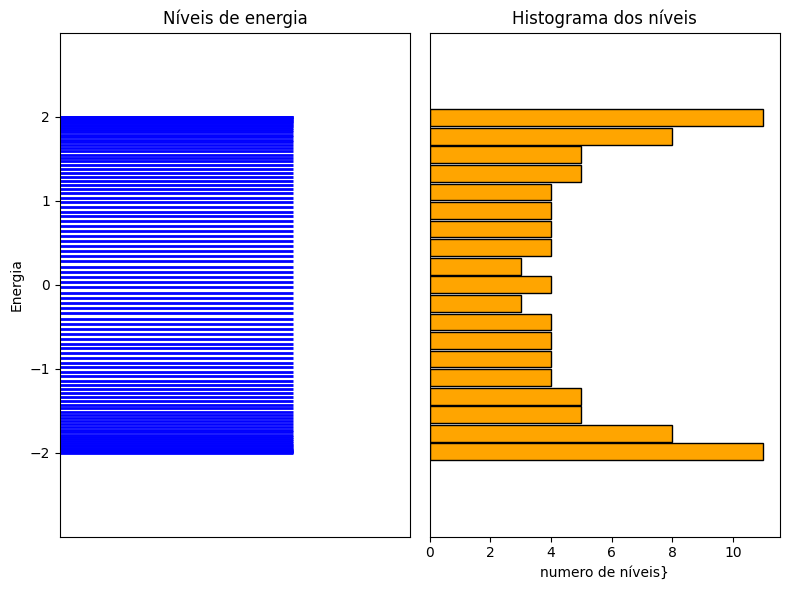

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define o valor de t
t = 1.0

# Define o Hamiltoniano (matriz 3x3)
#H = np.array([
#   [0, t, 0, t],
#    [t, 0, t, 0],
#    [0, t, 0, t],
#    [t, 0, t, 0]
#])

t = 1  # ou qualquer valor
n = 100

# Matriz 100x100 preenchida com zeros
H = np.zeros((n, n))

# Preenche com o padrão de vizinhança linear
for i in range(n):
    if i > 0:
        H[i, i-1] = t
    if i < n - 1:
        H[i, i+1] = t

# Calcula os autovalores e autovetores
eigenvalues, eigenvectors = np.linalg.eigh(H)

# Ordena os autovalores para melhor visualização
eigenvalues = np.sort(eigenvalues)

# Prepara o gráfico
fig, (ax_levels, ax_hist) = plt.subplots(1, 2, figsize=(8, 6), gridspec_kw={'width_ratios': [1, 1]})

# --- Gráfico dos níveis de energia (autovalores)
for i, val in enumerate(eigenvalues):
    ax_levels.hlines(val, xmin=0, xmax=1, color='blue', linewidth=2)

ax_levels.set_xlim(0, 1.5)
ax_levels.set_ylim(min(eigenvalues) - 1, max(eigenvalues) + 1)
ax_levels.set_xticks([])
ax_levels.set_ylabel("Energia")
ax_levels.set_title("Níveis de energia")

# Histograma
bins = np.linspace(min(eigenvalues)-0.1, max(eigenvalues)+0.1, 20)
counts, bin_edges = np.histogram(eigenvalues, bins=bins)

# Calcula o centro dos bins para posicionar as barras
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bar_width = bin_edges[1] - bin_edges[0]

# Plota barras horizontais (histograma rotacionado)
ax_hist.barh(bin_centers, counts, height=bar_width * 0.9, color='orange', edgecolor='black')

ax_hist.set_ylim(min(eigenvalues) - 1, max(eigenvalues) + 1)
ax_hist.set_xlabel("numero de níveis}")
ax_hist.set_yticks([])
ax_hist.set_title("Histograma dos níveis")

plt.tight_layout()
plt.show()